In [10]:
import tensorflow as tf
from tensorflow.keras.layers import Input,LSTM, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [11]:
(x_train,  y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [12]:
x_train, x_test = x_train / 255.0, x_test / 255.0

In [13]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [22]:
input_shape = (28, 28)
inputs = Input(shape=input_shape)
rnn_layer = LSTM(128)(inputs)
outputs= Dense(10, activation='softmax')(rnn_layer)
model = Model(inputs=inputs, outputs=outputs)

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 42ms/step - accuracy: 0.9892 - loss: 0.0354 - val_accuracy: 0.9858 - val_loss: 0.0454
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 80s 43ms/step - accuracy: 0.9915 - loss: 0.0278 - val_accuracy: 0.9849 - val_loss: 0.0528
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9912 - loss: 0.0282 - val_accuracy: 0.9872 - val_loss: 0.0432
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9924 - loss: 0.0229 - val_accuracy: 0.9843 - val_loss: 0.0533
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - accuracy: 0.9939 - loss: 0.0192 - val_accuracy: 0.9884 - val_loss: 0.0388


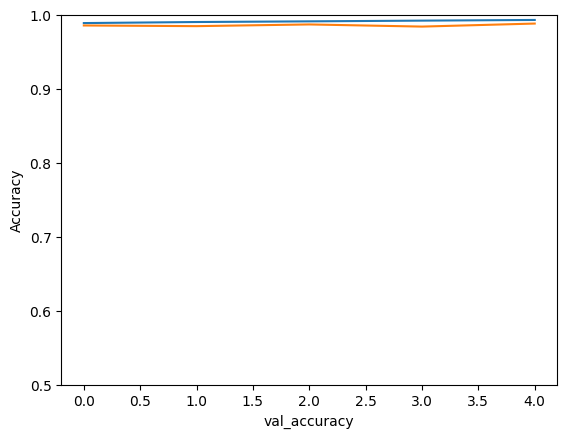

In [29]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('val_accuracy')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.show()

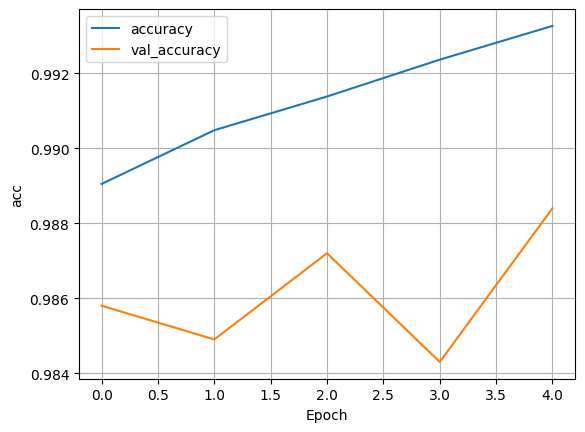

In [30]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('acc')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - accuracy: 0.9848 - loss: 0.0510
Test Loss: 0.0388
Test Accuracy: 0.9884


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


Text(0.5, 1.0, 'Predicted : 4 Actual : 4')

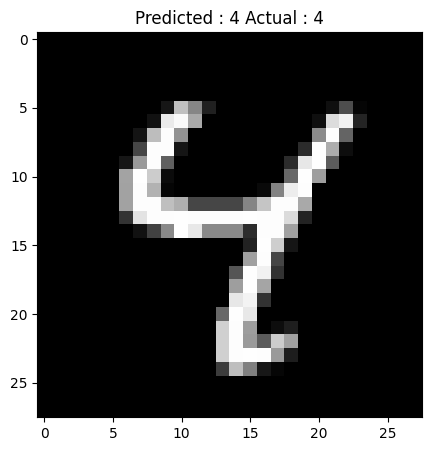

In [33]:
plt.figure(figsize=(5,5))
plt.imshow(x_test[6],cmap='gray')

class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
y_pred = model.predict(x_test)
y_pred1 = np.argmax(y_pred, axis=1)

actual_label = np.argmax(y_test[6])

plt.title(f'Predicted : {class_names[y_pred1[6]]} Actual : {class_names[actual_label]}')